In [2]:
# Importing required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import DistanceMetric


import warnings

sns.set()
warnings.filterwarnings("ignore")
import json


In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
df_pre=df

In [4]:
df_pre['date'] = df_pre['date'].astype("string")


In [5]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  string 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [6]:
df_pre[['date_f','ti']]=df_pre['date'].str.split(' ',1, expand=True)

In [7]:
df_split = df_pre[['date_f','ti']]

In [8]:
df_split

,date_f,ti
0,2016-01-11,17:00:00
1,2016-01-11,17:10:00
2,2016-01-11,17:20:00
3,2016-01-11,17:30:00
4,2016-01-11,17:40:00
...,...,...
19730,2016-05-27,17:20:00
19731,2016-05-27,17:30:00
19732,2016-05-27,17:40:00
19733,2016-05-27,17:50:00


In [9]:
df_pre

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,date_f,ti
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,2016-01-11,17:00:00
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,2016-01-11,17:10:00
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,2016-01-11,17:20:00
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,2016-01-11,17:30:00
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,2016-01-11,17:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,2016-05-27,17:20:00
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,2016-05-27,17:30:00
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,2016-05-27,17:40:00
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,2016-05-27,17:50:00


In [10]:
df_pre['Datetime'] = pd.to_datetime(df_pre['date_f'] + ' ' + df_pre['ti'],format = '%Y/%m/%d %H:%M')
# changed the Date Column in datetime format

In [11]:
df_pre

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,date_f,ti,Datetime
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,2016-01-11,17:00:00,2016-01-11 17:00:00
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,2016-01-11,17:10:00,2016-01-11 17:10:00
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,2016-01-11,17:20:00,2016-01-11 17:20:00
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,2016-01-11,17:30:00,2016-01-11 17:30:00
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,2016-01-11,17:40:00,2016-01-11 17:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,2016-05-27,17:20:00,2016-05-27 17:20:00
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,2016-05-27,17:30:00,2016-05-27 17:30:00
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,2016-05-27,17:40:00,2016-05-27 17:40:00
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,2016-05-27,17:50:00,2016-05-27 17:50:00


In [12]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  string        
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [13]:
df_pre

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,date_f,ti,Datetime
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,2016-01-11,17:00:00,2016-01-11 17:00:00
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,2016-01-11,17:10:00,2016-01-11 17:10:00
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,2016-01-11,17:20:00,2016-01-11 17:20:00
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,2016-01-11,17:30:00,2016-01-11 17:30:00
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,2016-01-11,17:40:00,2016-01-11 17:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,2016-05-27,17:20:00,2016-05-27 17:20:00
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,2016-05-27,17:30:00,2016-05-27 17:30:00
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,2016-05-27,17:40:00,2016-05-27 17:40:00
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,2016-05-27,17:50:00,2016-05-27 17:50:00


In [14]:
cols = list(df_pre)[2:29]

In [15]:
cols

['lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'rv2']

In [16]:
final_X= df_pre.iloc[:,2:29] 

In [17]:
final_Y= df_pre['Appliances']

In [18]:
final_Y

0         60
1         60
2         50
3         50
4         60
        ... 
19730    100
19731     90
19732    270
19733    420
19734    430
Name: Appliances, Length: 19735, dtype: int64

In [19]:
split = round(len(final_X) *.80) # Split the data in the ratio 80:20(train:test)

In [20]:
split

15788

In [21]:
X_train,X_test,Y_train,Y_test=final_X[:split],final_X[split:],final_Y[:split],final_Y[split:]

In [22]:
X_train

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,30,19.890000,47.596667,19.200000,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,30,19.890000,46.693333,19.200000,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,30,19.890000,46.300000,19.200000,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,40,19.890000,46.066667,19.200000,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,40,19.890000,46.333333,19.200000,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15783,0,21.290000,37.266667,18.790000,40.400000,22.79,37.200000,19.290000,37.590000,19.100000,...,19.200000,41.526667,5.100000,757.850000,96.000000,1.000000,40.000000,4.450000,46.209498,46.209498
15784,0,21.356667,37.660000,18.890000,40.590000,22.73,36.926667,19.230000,37.723333,19.033333,...,19.200000,41.466667,5.200000,757.933333,95.666667,1.000000,40.000000,4.500000,32.651660,32.651660
15785,0,21.390000,37.950000,18.963333,40.530000,22.60,36.433333,19.290000,38.566667,19.100000,...,19.200000,41.400000,5.300000,758.016667,95.333333,1.000000,40.000000,4.550000,6.571723,6.571723
15786,0,21.390000,38.000000,19.000000,40.290000,22.60,36.560000,19.290000,38.700000,19.166667,...,19.200000,41.163333,5.400000,758.100000,95.000000,1.000000,40.000000,4.600000,3.177356,3.177356


In [23]:
X_test

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
15788,0,21.390000,38.260000,19.133333,40.363333,22.600000,36.500000,19.290000,38.730000,19.23,...,19.20,40.760000,5.666667,758.233333,92.666667,1.000000,40.000000,4.533333,29.771444,29.771444
15789,0,21.390000,38.126667,19.200000,40.230000,22.600000,36.545000,19.356667,38.990000,19.20,...,19.20,40.566667,5.800000,758.300000,91.500000,1.000000,40.000000,4.500000,27.174247,27.174247
15790,0,21.390000,38.090000,19.263333,40.026667,22.633333,36.590000,19.390000,39.326667,19.20,...,19.20,40.363333,5.933333,758.366667,90.333333,1.000000,40.000000,4.466667,30.335592,30.335592
15791,10,21.390000,38.030000,19.530000,39.766667,22.700000,36.590000,19.463333,39.466667,19.20,...,19.20,40.290000,6.066667,758.433333,89.166667,1.000000,40.000000,4.433333,32.784644,32.784644
15792,0,21.323333,37.900000,19.730000,39.296667,22.700000,36.590000,19.500000,39.500000,19.20,...,19.29,40.400000,6.200000,758.500000,88.000000,1.000000,40.000000,4.400000,17.562462,17.562462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.20,...,23.20,46.790000,22.733333,755.200000,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.23,...,23.20,46.790000,22.600000,755.200000,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.23,...,23.20,46.790000,22.466667,755.200000,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.20,...,23.20,46.817500,22.333333,755.200000,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [24]:
Y_test_array = np.array(Y_test)

In [25]:
Y_test_array

array([370, 590, 320, ..., 270, 420, 430], dtype=int64)

In [26]:
#Perform Scaling, so that all features are in the range between 0 to 1
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform (X_test)


In [27]:
X_train_scaled

array([[0.42857143, 0.42407661, 0.55754117, ..., 0.66111111, 0.26544891,
        0.26544891],
       [0.42857143, 0.42407661, 0.53218563, ..., 0.65555556, 0.37208289,
        0.37208289],
       [0.42857143, 0.42407661, 0.52114521, ..., 0.65      , 0.57284766,
        0.57284766],
       ...,
       [0.        , 0.62927497, 0.28677021, ..., 0.61944444, 0.13135113,
        0.13135113],
       [0.        , 0.62927497, 0.28817365, ..., 0.62222222, 0.06345185,
        0.06345185],
       [0.        , 0.62927497, 0.29921407, ..., 0.62037037, 0.63185244,
        0.63185244]])

In [28]:
X_test_scaled

array([[0.        , 0.62927497, 0.29547156, ..., 0.61851852, 0.59542715,
        0.59542715],
       [0.        , 0.62927497, 0.29172904, ..., 0.61666667, 0.54347406,
        0.54347406],
       [0.        , 0.62927497, 0.29069985, ..., 0.61481481, 0.60671209,
        0.60671209],
       ...,
       [0.14285714, 1.19151847, 0.52947231, ..., 1.1037037 , 0.58397859,
        0.58397859],
       [0.14285714, 1.19151847, 0.54051272, ..., 1.10185185, 0.12637146,
        0.12637146],
       [0.14285714, 1.19151847, 0.52956587, ..., 1.1       , 0.68239057,
        0.68239057]])

# KNN Regression

In [1]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train_scaled,Y_train)  #fit the model
    pred_knn=model.predict(X_test_scaled) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test_array,pred_knn)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 136.53109463555018
RMSE value for k=  2 is: 116.07654752241115
RMSE value for k=  3 is: 108.50095520868973
RMSE value for k=  4 is: 105.59475258505444
RMSE value for k=  5 is: 103.3480961800386
RMSE value for k=  6 is: 101.62524543819592
RMSE value for k=  7 is: 100.68696270712638
RMSE value for k=  8 is: 99.54158649392672
RMSE value for k=  9 is: 98.90045375318539
RMSE value for k=  10 is: 98.26509235726468
RMSE value for k=  11 is: 97.6982681547702
RMSE value for k=  12 is: 97.4240996056177
RMSE value for k=  13 is: 97.26003831868542
RMSE value for k=  14 is: 97.32544455365904
RMSE value for k=  15 is: 97.20023512240726
RMSE value for k=  16 is: 97.24696532708924
RMSE value for k=  17 is: 96.99585405470701
RMSE value for k=  18 is: 96.76008048842709
RMSE value for k=  19 is: 96.6938936053614
RMSE value for k=  20 is: 96.76590559926261


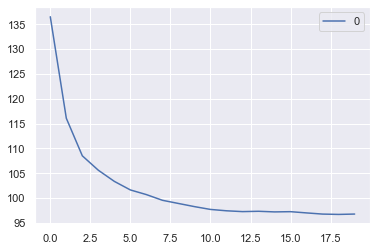

In [54]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [55]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train_scaled,Y_train)
model.best_params_


{'n_neighbors': 9}

# XGBOOST

In [29]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(objective='reg:squarederror') # Xgboost Model is instantiated
model_xgb.fit(X_train_scaled, Y_train) # Xgboost Model is fit

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Above are the Hyperparameters used to fit the XgBoost Model for the Energy Prediction

In [30]:
pred_xgb=model_xgb.predict(X_test_scaled) #Trained Model is used for prediction



In [31]:
pred_xgb

array([ 75.96165 ,  78.934166,  76.929565, ..., 444.3339  , 449.1479  ,
       466.60526 ], dtype=float32)

In [32]:
Y_test_array

array([370, 590, 320, ..., 270, 420, 430], dtype=int64)

In [33]:
pred_data = pd.DataFrame({'Actual': Y_test_array, 'Prediction': pred_xgb}, columns=['Actual', 'Prediction'])

In [34]:
pred_data

,Actual,Prediction
0,370,75.961647
1,590,78.934166
2,320,76.929565
3,310,94.466949
4,260,118.559792
...,...,...
3942,100,481.191498
3943,90,457.289093
3944,270,444.333893
3945,420,449.147888


In [8]:
from sklearn.metrics import mean_squared_error


rmse_xgb = rounnp.sqrt(mean_squared_error(pred_data['Actual'],pred_data['Prediction'])),2)

print(f"RMSE for for LGBM - {rmse_xgb}")

RMSE for for LGBM - 62.66


# LightGBM

In [43]:
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(learning_rate=0.04,objective='regression',max_depth=5,random_state=200) # LGBM Model is instantiated
model_lgb.fit(X_train_scaled,Y_train) # LGBM Model is fit


LGBMRegressor(learning_rate=0.04, max_depth=5, objective='regression',
              random_state=200)

In [44]:
pred_lgb=model_lgb.predict(X_test_scaled) #Trained Model is used for prediction

In [45]:
pred_lgb

array([ 58.87200996,  58.87200996,  59.7057029 , ..., 265.94113183,
       264.98806494, 266.65737845])

In [46]:
pred_data_lgb = pd.DataFrame({'Actual': Y_test_array, 'Prediction': pred_lgb}, columns=['Actual', 'Prediction'])

In [47]:
pred_data_lgb

,Actual,Prediction
0,370,58.872010
1,590,58.872010
2,320,59.705703
3,310,82.944322
4,260,69.437770
...,...,...
3942,100,353.314522
3943,90,353.801974
3944,270,265.941132
3945,420,264.988065


In [5]:
from sklearn.metrics import mean_squared_error


rmse_lgbm = np.sqrt(mean_squared_error(pred_data_lgb['Actual'],pred_data_lgb['Prediction']))

print(f"RMSE for for LGBM - {rmse_lgbm}")

RMSE for for LGBM - 60.87
